#### `Libraries`

In [53]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### Data Preprocessing
##### 1. Load Data

In [21]:
df = pd.read_csv(r"C:\Users\R\Desktop\Data Analysis\Datasets\loan_prediction_data.csv")

In [22]:
df.shape

(614, 13)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.duplicated().sum()  

np.int64(0)

In [27]:
df  = df.dropna()

2. Statistical Measures

In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


#

3. Label Encoding

In [29]:
# Replace categorical values with numerical values
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


4 Feature Engineering

In [31]:
# Replace the value of 3+ to 4
df  = df.replace(to_replace='3+', value=4)
df["Dependents"].unique()

array(['1', '0', '2', 4], dtype=object)

In [32]:
df["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

#### Explore

##### Distributions of Numerical Features

In [62]:
df["ApplicantIncome"].describe()

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

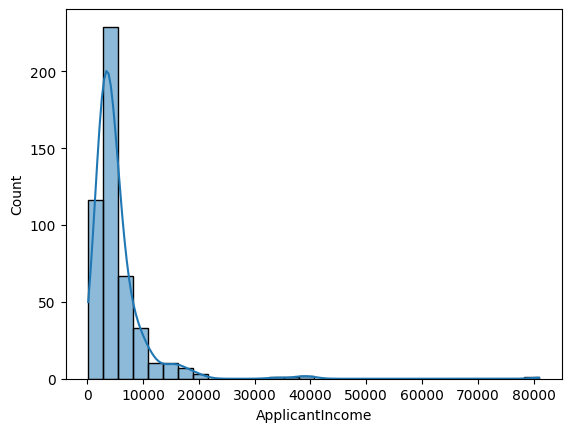

In [64]:
sns.histplot(df["ApplicantIncome"], bins = 30, kde=True)
plt.show();

In [65]:
df["LoanAmount"].describe() 

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

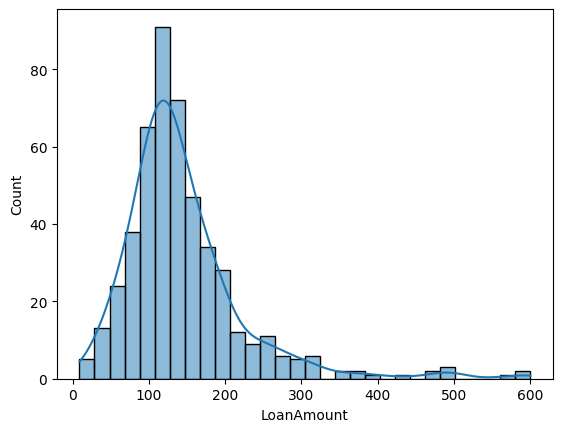

In [67]:
sns.histplot(df["LoanAmount"], bins=30, kde=True)
plt.show();

#### 1. Data Visualization
   ##### Education vs Loan Status

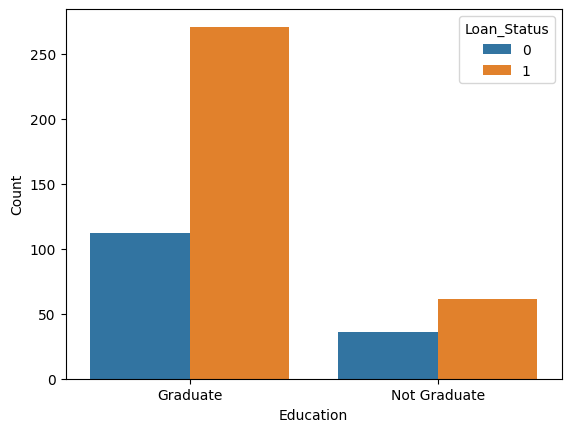

In [33]:
sns.countplot(x="Education", hue="Loan_Status", data=df)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show();

##### Marital Status vs Loan Status

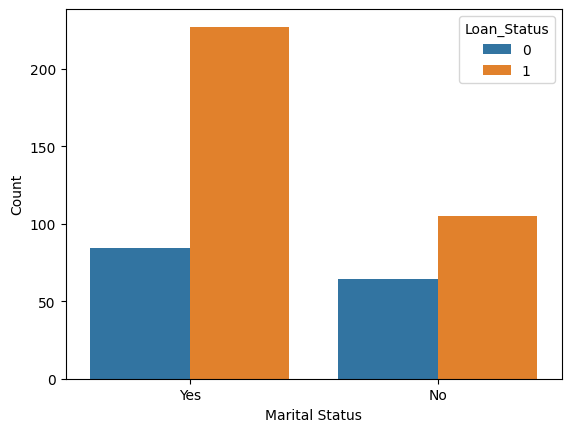

In [34]:
sns.countplot(x="Married", hue="Loan_Status", data=df)
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Convert categorial columns to numerical values

In [35]:
df.replace({"Married":{'No':0,'Yes':1},"Education":{'Graduate':1,'Not Graduate':0}, "Gender":{'Male':1,'Female':0},
                 "Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Urban':0,'Rural':1,'Semiurban':2}}, inplace=True)

In [36]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

#### Split Data

In [37]:
X = df.drop(columns=["Loan_ID","Loan_Status"], axis=1)
y = df["Loan_Status"]

Train Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state =42) 

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


#### Training Model: 
##### Support Vector Machine Model

In [57]:
classifier = svm.SVC(kernel='linear') 

Train the Support Vector Model

In [58]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Model Evaluation: Accuracy score

In [60]:
X_pred = classifier.predict(X_train)
train_data_accuracy = accuracy_score(X_pred, y_train) 
print("Accuracy score of training data : ", train_data_accuracy)

Accuracy score of training data :  0.7760416666666666


In [61]:
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print("Accuracy score of test data : ", test_data_accuracy)

Accuracy score of test data :  0.7916666666666666
